# Due 09/25

The enrollment by zipcode data includes the enrollment count for the various institutions in the UH system according to enrollment semesters and zipcode.

We would like to see the overall trends in enrollment (meaning the sum of all people enrolled for an institution regardless of zipcode) over the last 10 years for at least 2 of UH institutions.

Below is a bar chart showing the enrollment to the institutions "University of Hawai`i at Manoa" and "Leeward Community College" for the semesters "Fall 2012" and "Fall 2022".

1. Is this the best way to present this data? Is it easy to see the trends when the data is shown this way?

The double bar chart comparing enrollment between "University of Hawai`i at Manoa" and "Leeward Community College" for Fall 2012 and Fall 2022 is a snapshot of enrollment changes at two specific time points. It is easy to see the enrollment comparison for these two years; however, it is definitely not the way to visualize the complete trend over a 10-year period, as it only highlights two points in time. To capture the full trend, a multi-line line chart would be far more appropriate.

2. Is this a complete view of the data? The Covid-19 epidemic may have been disruptive and we should look at data for every year in the 2012-2022 period.

No, the double bar chart with only two years (Fall 2012 and Fall 2022) does not provide a complete view of the data. To account for factors like the COVID-19 pandemic and understand enrollment trends over the entire 2012-2022 period, it's essential to analyze data for each year individually. A complete yearly trend analysis via line chart, which visualizes trends over a span of time, will give a more accurate picture of the changes and fluctuations over time.

3. Should we use a bar chart? If not, what else? If yes, which variant (grouped, stacked, etc.)?

For a better analysis of a 10-year trend, a line chart would be more appropriate. A line chart can effectively show the trend over time. Each campus could have its line on the same chart, and you can easily compare the enrollment trends. A grouped bar chart can also work well, with each year showing a pair of bars (one for each campus) for direct yearly comparisons.

4. What aesthetic elements can improve the visualization?

Color Coding: Use distinct colors for each campus to differentiate them.
Labels: Include labels on data points, axes, and gridlines to provide context and improve readability.
Legends: Include a legend to explain which color represents each campus (for line charts).
Data Labels: Add data labels to the chart to display specific enrollment numbers for each data point.
Axis Scaling: Ensure that the y-axis is scaled appropriately to prevent misinterpretation of data trends.
Annotations: Include annotations or callout boxes for significant events, such as the COVID-19 pandemic, to provide context for data fluctuations.

## Enrollment over the years

### 1. Wrangle the data so you have enrollment counts for every year between 2012-2022 for Manoa and another institution of your choice (you can choose to add more of the UH institutions)

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
enrollment_zipcode = pd.read_csv("enrollmentzipcode.csv")
enrollment_zipcode.head()

,SEMESTER,SPRADDR_ZIP_PR,IRO_INSTITUTION_DESCL,HAWAIIAN_LEGACY,ENROLLMENT
0,Fall 2012,96706,Honolulu Community College,NaN,24
1,Fall 2012,96826,Kapi`olani Community College,NaN,5
2,Fall 2012,96734,Windward Community College,NaN,205
3,Fall 2012,96797,Leeward Community College,NaN,517
4,Fall 2012,96712,University of Hawai`i at Manoa,NaN,37


In [3]:
enrollment_zipcode['IRO_INSTITUTION_DESCL'].unique()

array(['Honolulu Community College', 'Kapi`olani Community College',
       'Windward Community College', 'Leeward Community College',
       'University of Hawai`i at Manoa', 'University of Hawai`i at Hilo',
       'University of Hawai`i - West O`ahu',
       'University of Hawai`i Maui College', 'Hawai`i Community College',
       'Kaua`i Community College'], dtype=object)

In [4]:
enroll_2012 = enrollment_zipcode[enrollment_zipcode['SEMESTER'].str.contains('2012')]
enroll_2012

,SEMESTER,SPRADDR_ZIP_PR,IRO_INSTITUTION_DESCL,HAWAIIAN_LEGACY,ENROLLMENT
0,Fall 2012,96706,Honolulu Community College,NaN,24
1,Fall 2012,96826,Kapi`olani Community College,NaN,5
2,Fall 2012,96734,Windward Community College,NaN,205
3,Fall 2012,96797,Leeward Community College,NaN,517
4,Fall 2012,96712,University of Hawai`i at Manoa,NaN,37
...,...,...,...,...,...
140857,Fall 2012,92075,Leeward Community College,NaN,1
140858,Fall 2012,78626,University of Hawai`i at Manoa,NaN,1
140859,Fall 2012,90503,University of Hawai`i at Manoa,NaN,1
140860,Fall 2012,92064,University of Hawai`i at Manoa,NaN,1


In [5]:
# Filter rows for University of Hawai`i at Manoa and Kapi`olani Community College
manoa_kcc = enrollment_zipcode[enrollment_zipcode['IRO_INSTITUTION_DESCL'].isin(["University of Hawai`i at Manoa", "Kapi`olani Community College"])]

# Extract the year from the 'SEMESTER' column
manoa_kcc['YEAR'] = manoa_kcc['SEMESTER'].str.extract(r'(\d{4})', expand=False)

# Group the data by year and institution and calculate the sum of enrollment
manoa_kcc_enrollment = manoa_kcc.groupby(['YEAR', 'IRO_INSTITUTION_DESCL'])['ENROLLMENT'].sum().reset_index()

# Display DataFrame
manoa_kcc_enrollment

/var/folders/nq/pks59g313w9d7lzlrrfh8r2r0000gn/T/ipykernel_70443/2903773652.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manoa_kcc['YEAR'] = manoa_kcc['SEMESTER'].str.extract(r'(\d{4})', expand=False)


,YEAR,IRO_INSTITUTION_DESCL,ENROLLMENT
0,2012,Kapi`olani Community College,8892
1,2012,University of Hawai`i at Manoa,20426
2,2013,Kapi`olani Community College,8376
3,2013,University of Hawai`i at Manoa,20006
4,2014,Kapi`olani Community College,7994
5,2014,University of Hawai`i at Manoa,19507
6,2015,Kapi`olani Community College,7816
7,2015,University of Hawai`i at Manoa,18865
8,2016,Kapi`olani Community College,7382
9,2016,University of Hawai`i at Manoa,18056


### 2. Use a markdown cell to explain your approach to wrangling the data.

First, I load in and preview the dataset using pd.read_csv and df.head(). This gives me an initial impression of what the dataset looks like, columns, data values, etc. From there, I check the column names. My goal is to find enrollment counts for every year between 2012-2022 for Manoa and KCC, so I work towards separating Manoa and KCC entries into a new dataframe. I check the column names because often times when data is raw, there can be great variation in the same name. For example: Manoa, manoa, typos such as mmanoa, etc. This dataset appears to have been cleaned, so isolated Manoa and KCC values is straightforward. Now we want values between 2012 - 2022. Using a similar approach as isolating by college, would be really cumbersome. There are Fall, Spring, and Summer semesters for most of the years and there are multiple years. Creating a long list of each value is one approach, but it is cumbersome. So we extract year values from the semesters. Finally, group values by semester and year, taking the sum of these enrollment values per year per college. 

### 3. Create a visualization that shows the enrollment trends for the 2 institutions over the years.

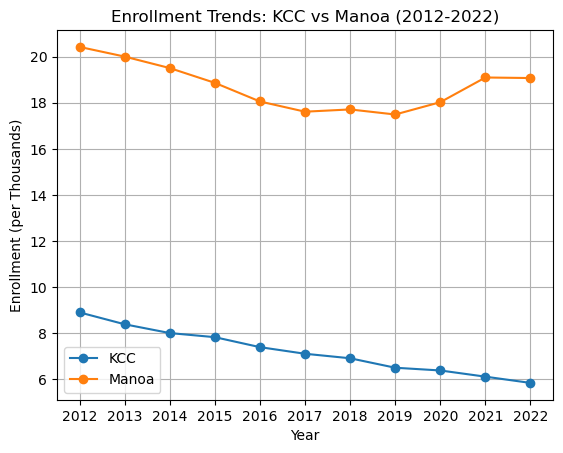

In [6]:
# Separate the data for the two institutions
kcc_data = manoa_kcc_enrollment[manoa_kcc_enrollment["IRO_INSTITUTION_DESCL"] == "Kapi`olani Community College"]
manoa_data = manoa_kcc_enrollment[manoa_kcc_enrollment["IRO_INSTITUTION_DESCL"] == "University of Hawai`i at Manoa"]

# Create a double line graph, reduce y-axis to be more readable
plt.plot(kcc_data["YEAR"], kcc_data["ENROLLMENT"]/1000, label="KCC", marker='o', linestyle='-')
plt.plot(manoa_data["YEAR"], manoa_data["ENROLLMENT"]/1000, label="Manoa", marker='o', linestyle='-')

# Add labels and a legend
plt.xlabel("Year")
plt.ylabel("Enrollment (per Thousands)")
plt.title("Enrollment Trends: KCC vs Manoa (2012-2022)")
plt.legend()

# Display the graph
plt.grid(True)
plt.show()

### 4. Use a markdown cell to explain your design choices.

As explained in the critiques of the example graph at the beginning of this notebook, I believe that a double line graph would be the best (most straightforward) way to visualize differences between 2 entities over time. The goal was to create a double line graph, one line for Manoa and the other for KCC. The x-axis would be years (2012 - 2022) and the y-axis would be enrollment numbers. So the first move was to separate the manoa_kcc_enrollment dataframe into separate dataframes for KCC and Manoa respectively. Then plot each as lines on the same plot. To better see value at each year, marker and linestyle were declared explicitly, rather than the default bare line. Afterwards, basic plot info was added: axis labels, a title, a legend, the basics. I did not care for the y-axis labels being so large (20000, 18000, 16000, etc.) so enrollment numbers were expressed per thousands and this was made explicit in the y-axis label.

### 5. Use a markdown cell to describe the trends you see.

What we see here is that enrollment has steadily declined between 2012 - 2019 for both KCC and Manoa. With the exception of a few years of increase from the preceeding year, they steadily decline. From there, KCC enrollment continues to decline, ultimately going from enrollment of 8892 in 2012 to 5828 in 2022. On the other hand, Manoa begins to slowly increase enrollment per year starting from between 2019 to 2020 and plateauing in 2021. The COVID-19 pandemic struck the US in the Spring of 2020 and the effects have been felt ever since. Perhaps explaining the change in enrollment trends around that time. Another obvious trend is that Manoa consistently has significantly greater enrollment numbers than KCC, approximately more than double KCC's numbers every year. This is not surprising, although KCC is much more affordable, Manoa is the public university servicing most of the island and even the state. KCC is known for their culinary and nursing programs, but still mostly services it's neighborhood. 

# ==========================================

## Enrollment of Hawaiian students

Our dataset also includes data regarding the Hawaiian legacy of the enrolled students.
How should we visualize the proportion of enrolled students of Hawaiian legacy out of the whole student body enrollment?
Address the following points in you computational notebook (or equivalent):

### 1. Wrangle the data so you have enrollment counts of the students with Hawaiian legacy aggregated over the full time period available in the data divided to the same UH institutions you chose in the previous section. Find the count of enrolled students not of Hawaiian legacy.

In [7]:
# Filter rows for University of Hawai`i at Manoa and Kapi`olani Community College
manoa_kcc = enrollment_zipcode[enrollment_zipcode['IRO_INSTITUTION_DESCL'].isin(["University of Hawai`i at Manoa", "Kapi`olani Community College"])]

# Extract the year from the 'SEMESTER' column
manoa_kcc['YEAR'] = manoa_kcc['SEMESTER'].str.extract(r'(\d{4})', expand=False)

# Group the data by year and institution and calculate the sum of enrollment
hawaiian_manoa_kcc_enrollment = manoa_kcc.groupby(['YEAR', 'IRO_INSTITUTION_DESCL', 'HAWAIIAN_LEGACY'])['ENROLLMENT'].sum().reset_index()

# Display DataFrame
hawaiian_manoa_kcc_enrollment

/var/folders/nq/pks59g313w9d7lzlrrfh8r2r0000gn/T/ipykernel_70443/278300100.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manoa_kcc['YEAR'] = manoa_kcc['SEMESTER'].str.extract(r'(\d{4})', expand=False)


,YEAR,IRO_INSTITUTION_DESCL,HAWAIIAN_LEGACY,ENROLLMENT
0,2012,Kapi`olani Community College,HAWAIIAN,1680
1,2012,University of Hawai`i at Manoa,HAWAIIAN,3049
2,2013,Kapi`olani Community College,HAWAIIAN,1550
3,2013,University of Hawai`i at Manoa,HAWAIIAN,2979
4,2014,Kapi`olani Community College,HAWAIIAN,1388
5,2014,University of Hawai`i at Manoa,HAWAIIAN,2895
6,2015,Kapi`olani Community College,HAWAIIAN,1377
7,2015,University of Hawai`i at Manoa,HAWAIIAN,2796
8,2016,Kapi`olani Community College,HAWAIIAN,1290
9,2016,University of Hawai`i at Manoa,HAWAIIAN,2651


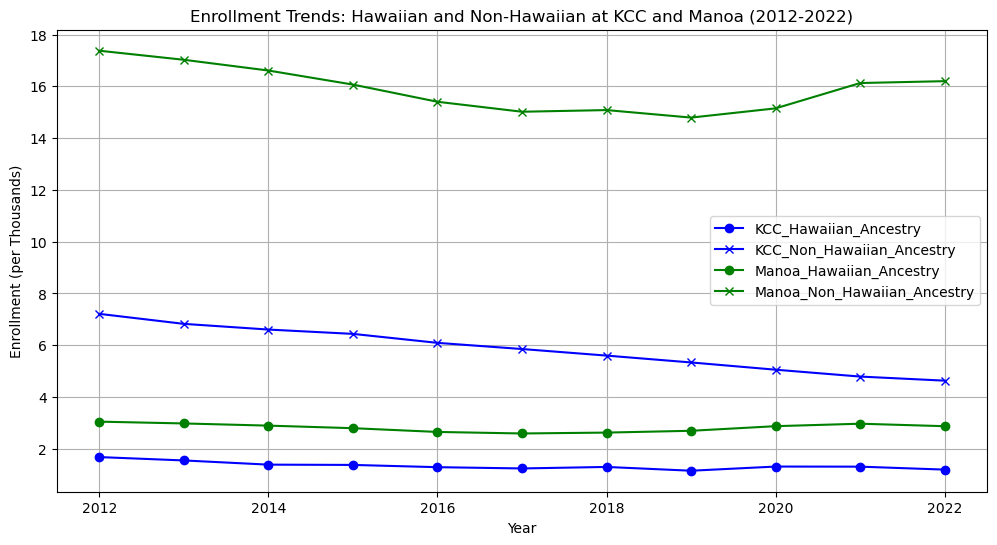

In [8]:
# pd Series for data years
year_col = np.arange(2012, 2023)

# Separate the data for the two institutions
kcc_hawaiian_data = hawaiian_manoa_kcc_enrollment[manoa_kcc_enrollment["IRO_INSTITUTION_DESCL"] == "Kapi`olani Community College"]
kcc_hawaiian_data_sans_hawaiian = kcc_hawaiian_data.drop(columns=["YEAR", "HAWAIIAN_LEGACY", "IRO_INSTITUTION_DESCL"])
kcc_hawaiian_data_sans_hawaiian.insert(loc=0, column='YEAR', value=year_col)
# Obtain non-hawaiian student enrollment
kcc_non_hawaiian_data = pd.DataFrame({"YEAR": np.arange(2012, 2023), "ENROLLMENT": kcc_data["ENROLLMENT"] - kcc_hawaiian_data_sans_hawaiian["ENROLLMENT"]})

# Separate the data for the two institutions
manoa_hawaiian_data = hawaiian_manoa_kcc_enrollment[manoa_kcc_enrollment["IRO_INSTITUTION_DESCL"] == "University of Hawai`i at Manoa"]
manoa_hawaiian_data_sans_hawaiian = manoa_hawaiian_data.drop(columns=["YEAR", "HAWAIIAN_LEGACY", "IRO_INSTITUTION_DESCL"])
manoa_hawaiian_data_sans_hawaiian.insert(loc=0, column='YEAR', value=year_col)
# Obtain non-hawaiian student enrollment
manoa_non_hawaiian_data = pd.DataFrame({"YEAR": np.arange(2012, 2023), "ENROLLMENT": manoa_data["ENROLLMENT"] - manoa_hawaiian_data_sans_hawaiian["ENROLLMENT"]})

# More information on plot, so enlarge size
plt.figure(figsize=(12, 6))

# Create a quad-line graph, reduce y-axis to be more readable
plt.plot(kcc_hawaiian_data_sans_hawaiian["YEAR"], kcc_hawaiian_data_sans_hawaiian["ENROLLMENT"]/1000, label="KCC_Hawaiian_Ancestry", marker='o', linestyle='-', color='b')
plt.plot(kcc_non_hawaiian_data["YEAR"], kcc_non_hawaiian_data["ENROLLMENT"]/1000, label="KCC_Non_Hawaiian_Ancestry", marker='x', linestyle='-', color='b')

plt.plot(manoa_hawaiian_data_sans_hawaiian["YEAR"], manoa_hawaiian_data_sans_hawaiian["ENROLLMENT"]/1000, label="Manoa_Hawaiian_Ancestry", marker='o', linestyle='-', color='g')
plt.plot(manoa_non_hawaiian_data["YEAR"], manoa_non_hawaiian_data["ENROLLMENT"]/1000, label="Manoa_Non_Hawaiian_Ancestry", marker='x', linestyle='-', color='g')

# # Add labels and a legend
plt.xlabel("Year")
plt.ylabel("Enrollment (per Thousands)")
plt.title("Enrollment Trends: Hawaiian and Non-Hawaiian at KCC and Manoa (2012-2022)")
plt.legend()

# Display the graph
plt.grid(True)
plt.show()

### 2. Use a markdown cell to explain your approach to wrangling the data.

Subset original dataset to KCC and Manoa enrollment of Hawaiian Ancestry. Then separate these two. Probably a much cleaner way to do this, but I had to drop and re-insert year to make the plots work. Non-Hawaiian enrollment is simply Total - Hawaiian enrollment numbers.

### 3. Create a visualization that shows the proportion of Hawaiian students in the chosen institution.

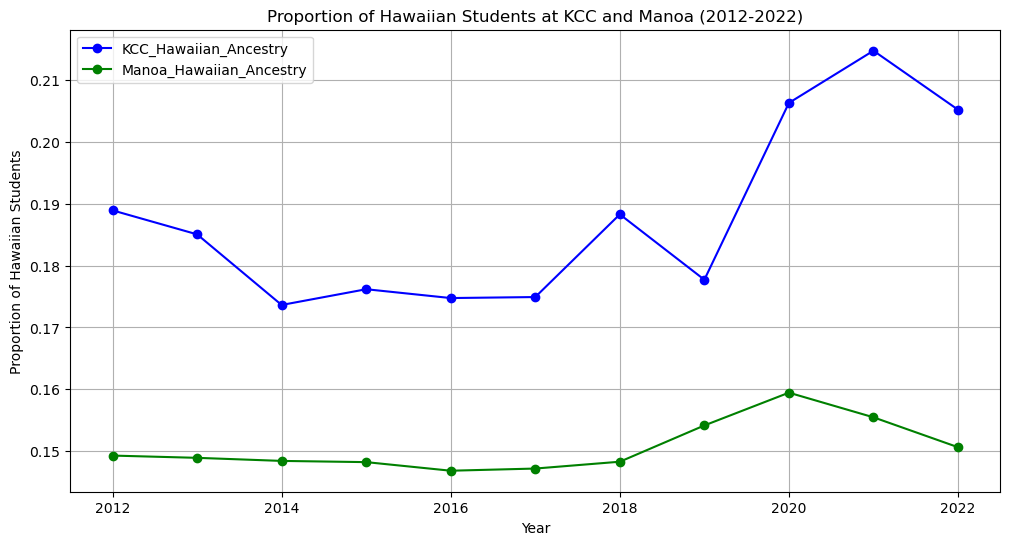

In [9]:
year_col = np.arange(2012, 2023)

# Calculate the proportion of Hawaiian students out of the total enrollment for each institution
kcc_hawaiian_prop = kcc_hawaiian_data_sans_hawaiian["ENROLLMENT"] / (kcc_hawaiian_data_sans_hawaiian["ENROLLMENT"] + kcc_non_hawaiian_data["ENROLLMENT"])
manoa_hawaiian_prop = manoa_hawaiian_data_sans_hawaiian["ENROLLMENT"] / (manoa_hawaiian_data_sans_hawaiian["ENROLLMENT"] + manoa_non_hawaiian_data["ENROLLMENT"])

# More information on plot, so enlarge size
plt.figure(figsize=(12, 6))

# Create a quad-line graph, reduce y-axis to be more readable
plt.plot(kcc_hawaiian_data_sans_hawaiian["YEAR"], kcc_hawaiian_prop, label="KCC_Hawaiian_Ancestry", marker='o', linestyle='-', color='b')
plt.plot(manoa_hawaiian_data_sans_hawaiian["YEAR"], manoa_hawaiian_prop, label="Manoa_Hawaiian_Ancestry", marker='o', linestyle='-', color='g')

# Add labels and a legend
plt.xlabel("Year")
plt.ylabel("Proportion of Hawaiian Students")
plt.title("Proportion of Hawaiian Students at KCC and Manoa (2012-2022)")
plt.legend()

# Display the graph
plt.grid(True)
plt.show()

### 4. Use a markdown cell to explain your design choices.

Again, double line plot to show trends over time. UH's color is green and I am not sure what color represents KCC officially, but blue is not too jarring to the eyes. 

### 5. Use a markdown cell to describe the results. Are they surprising?

Unfortunately, not at all surprising. There is an overwhelming difference between non-Hawaiian and Native Hawaiian student enrollment in colleges across the state. Nowhere more apparent than UHM, it is uncommon for mainland students to attend local CC's. Another major factor is that there are so few in 2023 that are able to identify as Native Hawaiian. The population is very small.